Тема “Обучение без учителя”
Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X = reduce_mem_usage(X)

Memory usage of dataframe is 0.03 MB
Memory usage after optimization is: 0.03 MB
Decreased by 0.0%


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


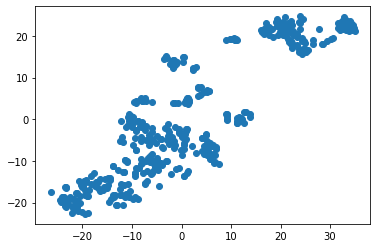

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Диаграмма рассеивания отличается от той, что представлена в уроке. По моему предположению это из за того что learning_rate=250 и random_state=42

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [19]:
from sklearn.cluster import KMeans

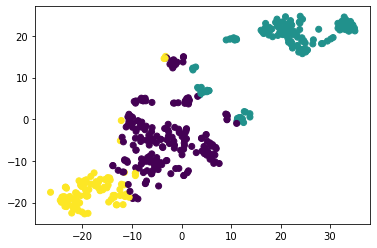

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [22]:
labels_train

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

In [30]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.300003,2.1007,24.0,666.0,20.200001,349.480011,24.910000,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.500000,4.4986,4.0,307.0,21.000000,395.619995,8.470000,0
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.299999,6.6407,1.0,304.0,16.900000,362.250000,7.830000,2
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.099998,2.0218,24.0,666.0,20.200001,2.520000,23.290001,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.500000,3.7965,4.0,307.0,21.000000,390.950012,11.280000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.900002,2.2110,5.0,384.0,20.900000,395.670013,18.660000,0
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.099998,4.4290,3.0,223.0,18.600000,388.649994,13.000000,0
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.700001,8.3440,4.0,280.0,17.000000,390.940002,5.990000,2
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.599998,2.1247,24.0,666.0,20.200001,109.849998,23.270000,1


In [29]:
X_train = X_train.assign(labels = labels_train)

In [41]:
labels_test = kmeans.predict(X_test_scaled)

In [42]:
X_test = X_test.assign(labels = labels_test)

In [43]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels
173,0.091780,0.0,4.05,0.0,0.510,6.416,84.099998,2.6463,5.0,296.0,16.600000,395.500000,9.040000,0
274,0.056440,40.0,6.41,1.0,0.447,6.758,32.900002,4.0776,4.0,254.0,17.600000,396.899994,3.530000,2
491,0.105740,0.0,27.74,0.0,0.609,5.983,98.800003,1.8681,4.0,711.0,20.100000,390.109985,18.070000,1
72,0.091640,0.0,10.81,0.0,0.413,6.065,7.800000,5.2873,4.0,305.0,19.200001,390.910004,5.520000,0
452,5.090170,0.0,18.10,0.0,0.713,6.297,91.800003,2.3682,24.0,666.0,20.200001,385.089996,17.270000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.811001,0.0,18.10,0.0,0.597,4.628,100.000000,1.5539,24.0,666.0,20.200001,28.790001,34.369999,1
436,14.420800,0.0,18.10,0.0,0.740,6.461,93.300003,2.0026,24.0,666.0,20.200001,27.490000,18.049999,1
411,14.050700,0.0,18.10,0.0,0.597,6.657,100.000000,1.5275,24.0,666.0,20.200001,35.049999,21.219999,1
86,0.051880,0.0,4.49,0.0,0.449,6.015,45.099998,4.4272,3.0,247.0,18.500000,395.989990,12.860000,0


In [64]:
y_train_df = pd.DataFrame(y_train, columns=('Price',))
y_test_df = pd.DataFrame(y_test, columns=('Price',))

In [65]:
y_train_df = y_train_df.assign(labels = labels_train)
y_test_df = y_test_df.assign(labels = labels_test)

In [85]:
print('Средние значения по приступности на обучающей выборке:')
print(X_train[['labels', 'CRIM']].groupby('labels').mean())

Средние значения по приступности на обучающей выборке:
             CRIM
labels           
0        0.420986
1       10.715219
2        0.072118


In [86]:
print('Средние значения по приступности на тестовой выборке:')
print(X_test[['labels', 'CRIM']].groupby('labels').mean())

Средние значения по приступности на тестовой выборке:
             CRIM
labels           
0        0.266079
1       10.165531
2        0.062060


In [87]:
print('Средние значения по цене на обучающей выборке:')
print(y_train_df[['labels', 'Price']].groupby('labels').mean())

Средние значения по цене на обучающей выборке:
            Price
labels           
0       24.971204
1       16.179688
2       27.874118


In [88]:
print('Средние значения по цене на тестовой выборке:')
print(y_test_df[['labels', 'Price']].groupby('labels').mean())

Средние значения по цене на тестовой выборке:
            Price
labels           
0       21.860784
1       16.437143
2       31.350000


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [89]:
labels_test = kmeans.predict(X_test_scaled)
X_test = X_test.assign(labels = labels_test)
y_test_df = pd.DataFrame(y_test, columns=('Price',))
y_test_df = y_test_df.assign(labels = labels_test)
print('Средние значения по приступности на тестовой выборке:')
print(X_test[['labels', 'CRIM']].groupby('labels').mean())
print('Средние значения по цене на тестовой выборке:')
print(y_test_df[['labels', 'Price']].groupby('labels').mean())


Средние значения по приступности на тестовой выборке:
             CRIM
labels           
0        0.266079
1       10.165531
2        0.062060
Средние значения по цене на тестовой выборке:
            Price
labels           
0       21.860784
1       16.437143
2       31.350000
